In [1]:
import matplotlib.pyplot as plt

In [12]:
import torch


def cosine_beta_schedule(t, s=0.008):
    """
    cosine schedule as proposed in https://arxiv.org/abs/2102.09672
    """
    alphas_cumprod = torch.cos((t + s) / (1 + s) * torch.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    beta = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(beta, 0.0001, 0.9999)

def linear_beta_schedule(t):
    beta_start = 0.0001
    beta_end = 0.02
    beta = (beta_end - beta_start) * t + beta_start
    return beta

def quadratic_beta_schedule(t):
    beta_start = 0.0001
    beta_end = 0.02
    return ((beta_end**0.5 - beta_start**0.5) * t + beta_start**0.5) ** 2 

def sigmoid_beta_schedule(t):
    beta_start = 0.0001
    beta_end = 0.02
    return torch.sigmoid(t) * (beta_end - beta_start) + beta_start

In [4]:
t = torch.linspace(0, 1, 1000)

In [8]:
cosine_beta = cosine_beta_schedule(torch.linspace(0, 1, 1001))
cosine_beta.shape

torch.Size([1000])

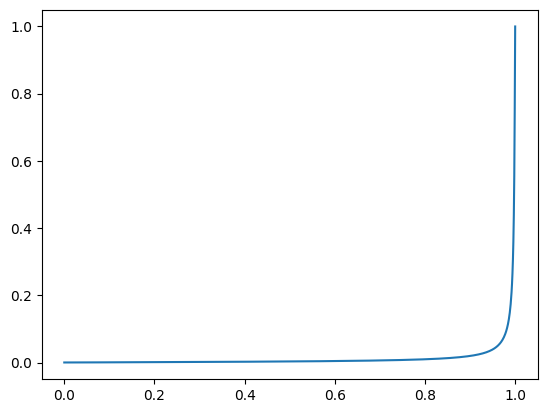

In [9]:
plt.plot(t, cosine_beta)

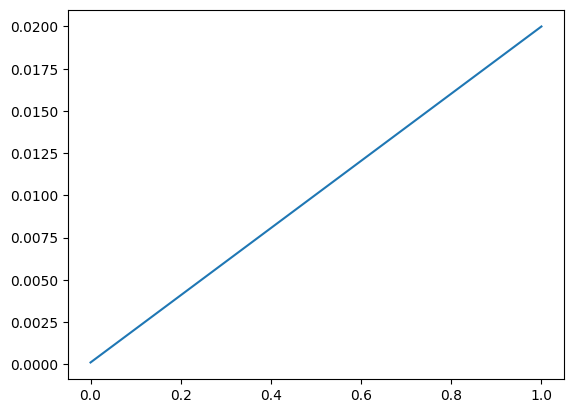

In [10]:
linear = linear_beta_schedule(t)
plt.plot(t, linear)

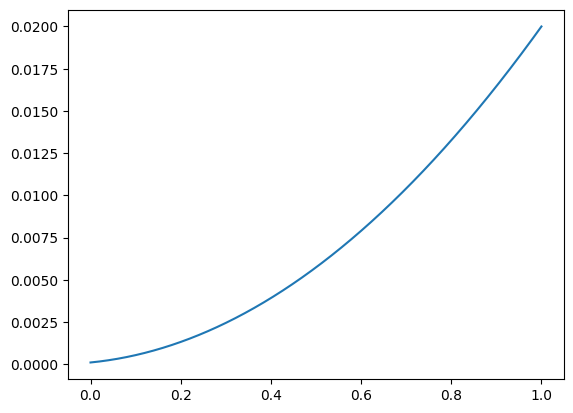

In [13]:
quadratic = quadratic_beta_schedule(t)
plt.plot(t, quadratic)

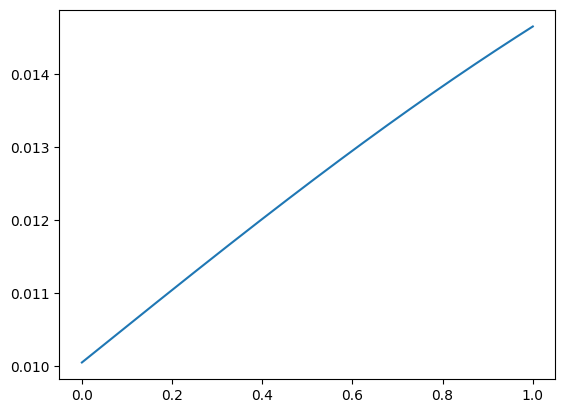

In [14]:
sigmoid = sigmoid_beta_schedule(t)
plt.plot(t, sigmoid)